# SQLite and Initial Setup
Relational databases generally have two components:

1.Database Server/Engine: A software package that manages databases and runs in the background, listening for SQL queries from authorized users E.g. MySQL server, Microsoft SQL server, Postgres etc.
2.Database Client: A command-line tool or graphical user interface (GUI) to connect to the database server and run SQL queries. E.g. MySQL workbench, PgAdmin etc.
The server and client can be on the same computer e.g. both on your laptop, or on different computers e.g. the database server can be running on the cloud and you can connect to it using a client installed on your computer.

Most database servers/engines are designed to operate on databases containing large amounts of data (e.g. 100s of GBs) and to handle a very high volume of queries (e.g. thousands of queries per second). They typically require powerful hardware i.e. multi-core CPUs and large amounts of RAM.

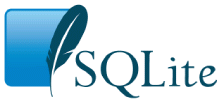


we'll use a lightweight database engine called SQLite, which is well-suited for databases with small amounts of data and has very limited CPU & RAM requirements. Despite being limited in its capabilities, it is the most widely used database engine in the world. SQLite is used by smartphone apps, web browsers, desktop applications, IoT devices etc. to store and manage data locally on the device.

In [1]:
!sqlite3 --version

'sqlite3' is not recognized as an internal or external command,
operable program or batch file.


Unlike other relational databases, SQLite doesn't have separate server and client packages. The sqlite3 command line tool is all your need to create and interact with SQLite databases. The databases themselves are stored as files with the extension .sqlite. You can perform CRUD operations on the database simply by passing SQL queries using sqlite3.

Here's a visual representation of how SQLite differs from other relational database servers (source):

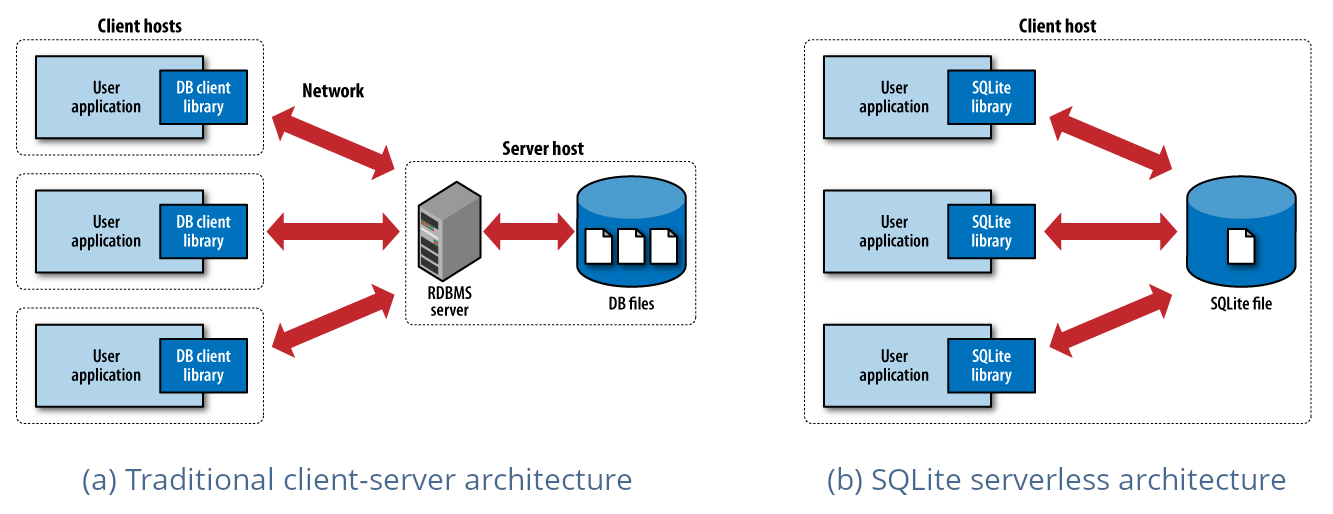


Note that a .sqlite file is different from a .sql file, which contains commands for creating tables and inserting data. The .sqlite file is the actual database where the data is stored in a binary tabular format for efficient querying and manipulation.

we'll use the Chinook open source database. Let's begin by downloading the .sqlite file for the database containing all the required tables and the sample data.



In [2]:
from urllib.request import urlretrieve

In [3]:
db_url = 'https://github.com/lerocha/chinook-database/raw/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite'

In [4]:
urlretrieve(db_url, 'chinook.sqlite')

('chinook.sqlite', <http.client.HTTPMessage at 0x27fd63fa6d0>)

The database chinook.sqlite is now downloaded. To access and interact with the database by writing SQL queries directly within Jupyter, we'll use the ipython-sql library that provides the %%sql magic commands. It uses the sqlalchemy library behind the scenes to interact with the database.

In [5]:
!pip install ipython-sql --quiet --upgrade


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install sqlalchemy --quiet


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%load_ext sql

We can now connect to the database using a SQLAlchemy connection string. We'll use the %%sql Jupyter magic command.

In [8]:
%%sql 

sqlite:///chinook.sqlite

# Chinook Database Structure and Queries
The Chinook database represents a digital media store, including tables for artists, albums, media tracks, invoices and customers. Here's an Entity Relationship Diagram (ERD) showing the structure of the Chinook database:

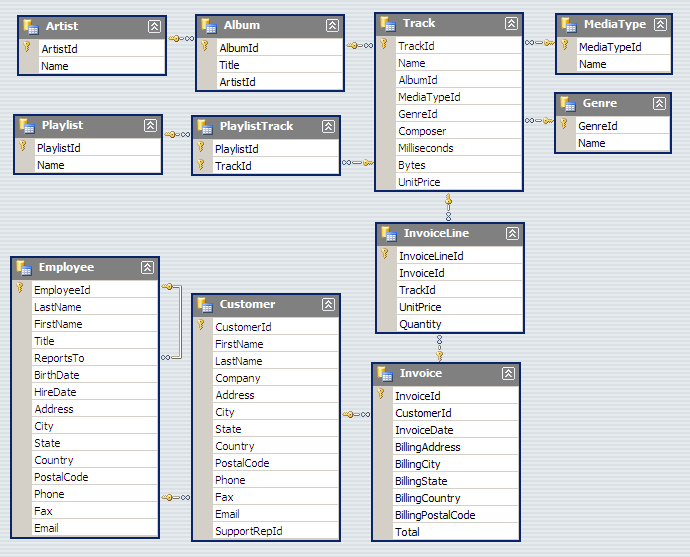



Let's begin by looking at the data from some of the tables in the database. We can write SQL queries directly within Jupyter code cells by including the magic command %%sql as the first line of the cell, indicating that contents of cell represent a SQL query.

In [9]:
%%sql 
.tables

 * sqlite:///chinook.sqlite
(sqlite3.OperationalError) near ".": syntax error
[SQL: .tables]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [10]:
%%sql 

SELECT * FROM Artist LIMIT 5

 * sqlite:///chinook.sqlite
Done.


ArtistId,Name
1,AC/DC
2,Accept
3,Aerosmith
4,Alanis Morissette
5,Alice In Chains


In [11]:
%%sql 
SELECT * FROM Track LIMIT 5

 * sqlite:///chinook.sqlite
Done.


TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman",230619,3990994,0.99
4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman",252051,4331779,0.99
5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [12]:
%%sql 
SELECT * FROM Album LIMIT 5

 * sqlite:///chinook.sqlite
Done.


AlbumId,Title,ArtistId
1,For Those About To Rock We Salute You,1
2,Balls to the Wall,2
3,Restless and Wild,2
4,Let There Be Rock,1
5,Big Ones,3


# Selection and Ordering
QUESTION 1: Write a SQL query to sort the rows from the table Track in alphabetical order of Track name and display the first 10 rows.

In [13]:
%%sql

SELECT *
FROM Track
ORDER BY Name
LIMIT 10;

 * sqlite:///chinook.sqlite
Done.


TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
3027,"""40""",239,1,1,U2,157962,5251767,0.99
2918,"""?""",231,3,19,None,2782333,528227089,1.99
3412,"""Eine Kleine Nachtmusik"" Serenade In G, K. 525: I. Allegro",281,2,24,Wolfgang Amadeus Mozart,348971,5760129,0.99
109,#1 Zero,11,1,4,"Cornell, Commerford, Morello, Wilk",299102,9731988,0.99
3254,#9 Dream,255,2,9,None,278312,4506425,0.99
602,'Round Midnight,48,1,2,Miles Davis,357459,11590284,0.99
1833,(Anesthesia) Pulling Teeth,150,1,3,Cliff Burton,254955,8234710,0.99
570,(Da Le) Yaleo,46,1,1,Santana,353488,11769507,0.99
3045,(I Can't Help) Falling In Love With You,241,1,8,None,207568,6905623,0.99
3057,(Oh) Pretty Woman,242,1,1,Bill Dees/Roy Orbison,174680,5665828,0.99


Write a SQL query to show the next 10 rows based on the above criteria.

In [14]:
%%sql 

SELECT * from track
order by track.Name asc
LIMIT 10
OFFSET 10;

 * sqlite:///chinook.sqlite
Done.


TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
3471,(There Is) No Greater Love (Teo Licks),322,2,9,Isham Jones & Marty Symes,167933,2773507,0.99
1947,(We Are) The Road Crew,160,1,3,Clarke/Kilmister/Taylor,192600,6283035,0.99
2595,(White Man) In Hammersmith Palais,211,1,4,Joe Strummer/Mick Jones,240640,7883532,0.99
709,(Wish I Could) Hideaway,55,1,1,J.C. Fogerty,228466,7432978,0.99
2869,...And Found,231,3,19,None,2563833,500330548,1.99
1894,...And Justice For All,156,1,3,"James Hetfield, Lars Ulrich & Kirk Hammett",585769,19262088,0.99
2906,...In Translation,230,3,19,None,2604575,215441983,1.99
3166,.07%,228,3,21,None,2585794,541715199,1.99
1268,01 - Prowler,100,1,6,Steve Harris,236173,5668992,0.99
1269,02 - Sanctuary,100,1,6,David Murray/Paul Di'Anno/Steve Harris,196284,4712576,0.99


Write some SQL queries in the cells below to explore the first few rows of each table in the database.

In [15]:
%%sql

Select count(name) as total_tables from sqlite_master
Where type ='table' and name Not Like 'sqlite_%';

 * sqlite:///chinook.sqlite
Done.


total_tables
11


In [16]:
%%sql

Select name as table_names from sqlite_master
Where type ='table' and name Not Like 'sqlite_%';

 * sqlite:///chinook.sqlite
Done.


table_names
Album
Artist
Customer
Employee
Genre
Invoice
InvoiceLine
MediaType
Playlist
PlaylistTrack


In [17]:
%%sql

Select name as table_names from sqlite_master
Where type ='table';

 * sqlite:///chinook.sqlite
Done.


table_names
Album
Artist
Customer
Employee
Genre
Invoice
InvoiceLine
MediaType
Playlist
PlaylistTrack


# Counting
QUESTION 2: Write a SQL query to calculate the total number of employees working at Chinook. 

In [18]:
%%sql
SELECT COUNT(EmployeeId) AS 'TOTAL'  FROM Employee

 * sqlite:///chinook.sqlite
Done.


TOTAL
8


Write SQL queries to calculate the total number customers, total number of artists and total number of tracks in the database.

In [19]:
%%sql 

SELECT COUNT(DISTINCT CustomerId) as TotalCustomers from 'Customer';

 * sqlite:///chinook.sqlite
Done.


TotalCustomers
59


In [20]:
%%sql 

SELECT COUNT(DISTINCT ArtistId) as TotalArtists from 'Artist';

 * sqlite:///chinook.sqlite
Done.


TotalArtists
275


In [21]:
%%sql 

SELECT COUNT(DISTINCT TrackId) as TotalTracks from 'Track';

 * sqlite:///chinook.sqlite
Done.


TotalTracks
3503


# Aggregation and Grouping
QUESTION 3: Write a SQL query to show the top 10 albums with the highest number of tracks. The result should contain 2 columns: album ID and number of tracks in the album (name the column "Tracks"). Here are the first few rows of the result: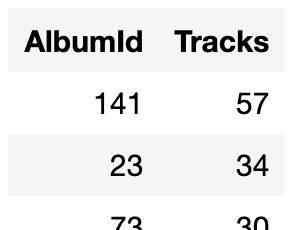

In [22]:
%%sql

SELECT AlbumID, COUNT(TrackID) AS Tracks
FROM Track
GROUP BY AlbumID
ORDER BY Tracks DESC
LIMIT 10;

 * sqlite:///chinook.sqlite
Done.


AlbumId,Tracks
141,57
23,34
73,30
229,26
230,25
251,25
83,24
231,24
253,24
24,23


Improve the above query to also show the album name, artist ID and artist name. Enter the updated query in the empty cell below.

In [23]:
%%sql 

SELECT a.Title as AlbumName, ar.ArtistId, ar.Name as ArtistName, a.AlbumId , count(t.Name) as NumberOfTracks
FROM Album a
JOIN Track t ON a.AlbumId = t.AlbumId
JOIN Artist ar ON a.ArtistId = ar.ArtistId
GROUP BY a.Title
ORDER BY NumberOfTracks DESC
LIMIT 10;

 * sqlite:///chinook.sqlite
Done.


AlbumName,ArtistId,ArtistName,AlbumId,NumberOfTracks
Greatest Hits,100,Lenny Kravitz,141,57
Minha Historia,17,Chico Buarque,23,34
Unplugged,81,Eric Clapton,73,30
"Lost, Season 3",149,Lost,229,26
"The Office, Season 3",156,The Office,251,25
"Lost, Season 1",149,Lost,230,25
My Way: The Best Of Frank Sinatra [Disc 1],85,Frank Sinatra,83,24
"Lost, Season 2",149,Lost,231,24
"Battlestar Galactica (Classic), Season 1",158,Battlestar Galactica (Classic),253,24
Instant Karma: The Amnesty International Campaign to Save Darfur,150,U2,255,23
